## **Instituto Tecnológico de Estudiios Superiores de Occidente**

**Carrera:** Ingeniería Civil 

**Profesor:** Cristian Camilo Zapata Zuluaga

**Integrante 1:** Jair Salvador Arreola Espinosa


**Integrante 2:** Rodrigo Girón Lugo


**Integrante 3:** Mauricio Armeria

# <font color=blue> PROYECTO 2</font>  
###  <font color=green> * Construction Partners, Inc. (ROAD)</font>
### <font color= green> * Granite Construction Incorporated (GVA)</font>
### <font color=green> * Sterling Construction Company, Inc. (STRL) </font>
### <font color=green> * CEMEX, S.A.B. de C.V.(CX) </font>

### OBJETIVOS

#### Objetivo general:
Analizar el comportamiento de las acciones de estas 4 empresas de construcción y realizar pruebas en diferentes escenarios para analizar las ganancias.
#### Objetivo especifico: 
Comprobar que empresa es mejor para invertir y analizar si cumple su comportamiento de crecimiento al igual que en nuestras simulaciónes.

###  Construction Partners, Inc. (ROAD) y Granite Construction Incorporated (GVA)

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_closes(names,start,end):
    closes = web.DataReader(name=names,data_source="yahoo",start=start,end=end)
    return closes["Adj Close"] 

**Precios ajustados del cierre**



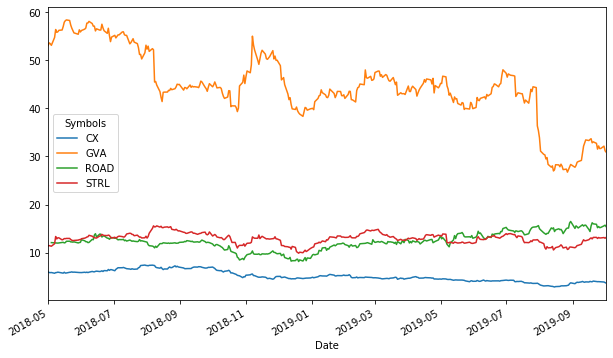

In [15]:
names = ['ROAD','GVA',"STRL","CX"]
start, end = '2018-05-01', '2019-10-1'
closes = get_closes(names,start,end)
closes.plot(figsize=(10,6));

 **Rendimientos porcentuales diarios de los dos activos junto con sus características estadísticas**

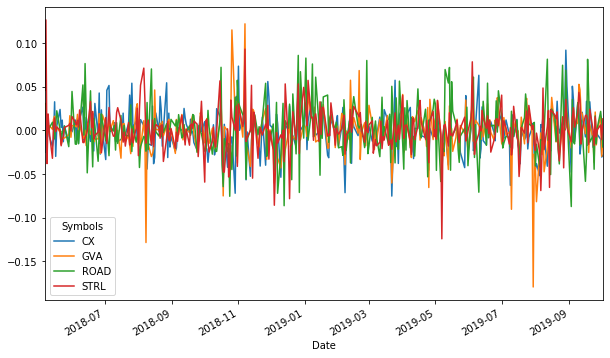

In [16]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [17]:
mu_ROAD, mu_GVA = ret.mean().ROAD, ret.mean().GVA
std_ROAD, std_GVA= ret.std().ROAD, ret.std().GVA
mu_STRL, mu_CX = ret.mean().STRL, ret.mean().CX
std_STRL, std_CX= ret.std().STRL, ret.std().CX

mu_ROAD, mu_GVA, std_ROAD, std_GVA, mu_STRL, mu_CX, std_STRL, std_CX

(0.001107664810856559,
 -0.0011876807469604646,
 0.029243678361019532,
 0.02563410806651177,
 0.0007149593595882333,
 -0.0010440924698013215,
 0.024257306226725946,
 0.023319323800978654)

# **Precios simulados en 1000 escenarios del año 2019**

In [6]:
def ret_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)

In [7]:
simret_ROAD = ret_sim(mu_ROAD, std_ROAD, 252, 1000, '2019-01-01')
simret_GVA = ret_sim(mu_GVA ,std_GVA , 252, 1000, '2019-01-01')

In [8]:
simcloses_ROAD = closes.iloc[-1].ROAD*((1+simret_ROAD).cumprod())
simcloses_GVA= closes.iloc[-1].GVA*((1+simret_GVA).cumprod())

### Construction Partners, Inc. (ROAD)

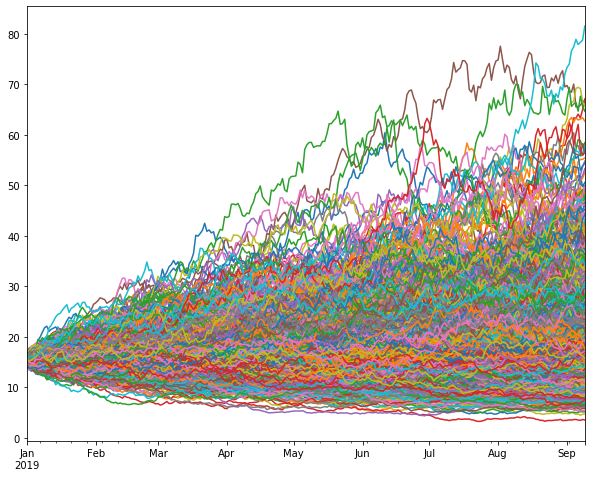

In [9]:
simcloses_ROAD.plot(figsize=(10,8),legend=False);

**Probabilidades con base en una tasa de interés anual deseada del $10\%$.**

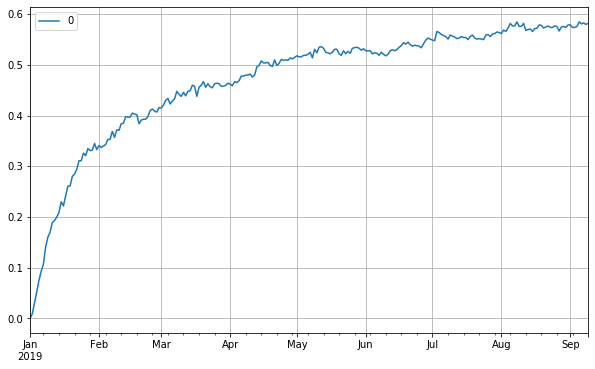

In [10]:
K_ROAD = (1+0.1)*closes.iloc[-1].ROAD
DF = simcloses_ROAD>K_ROAD
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

### Granite Construction Incorporated (GVA)

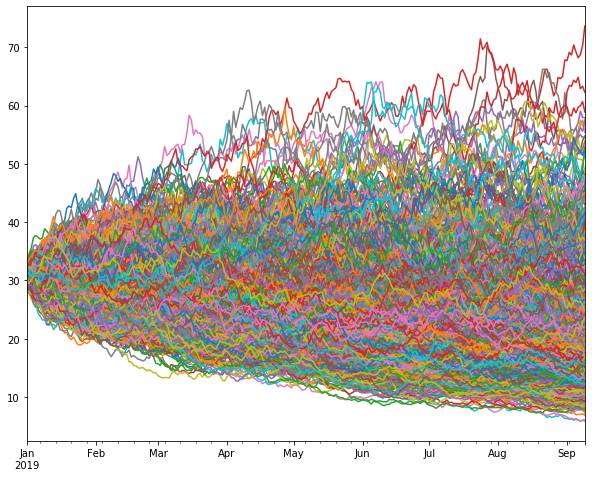

In [11]:
simcloses_GVA.plot(figsize=(10,8),legend=False);

**Probabilidades con base en una tasa de interés anual deseada del $10\%$.**

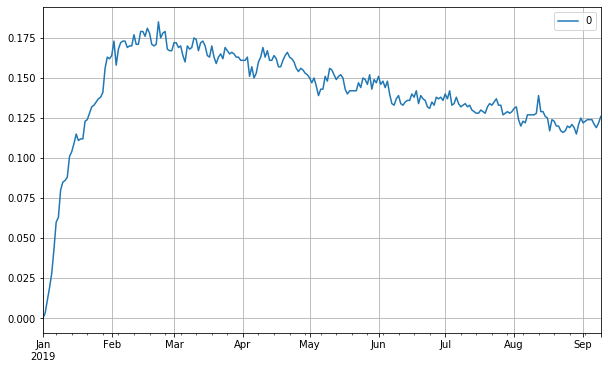

In [12]:
K_GVA= (1+0.1)*closes.iloc[-1].GVA
DF = simcloses_GVA>K_GVA
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

### **Valores reales del 2019**

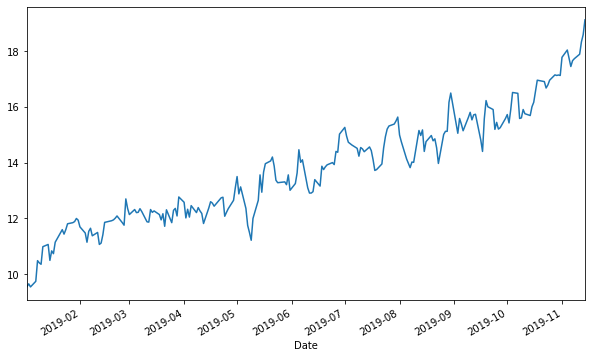

In [13]:
start, end = '2019-01-01', '2019-12-31'
name = ['ROAD','GVA']
closes2018 = get_closes(name,start,end)
closes2018.ROAD.plot(figsize=(10,6));

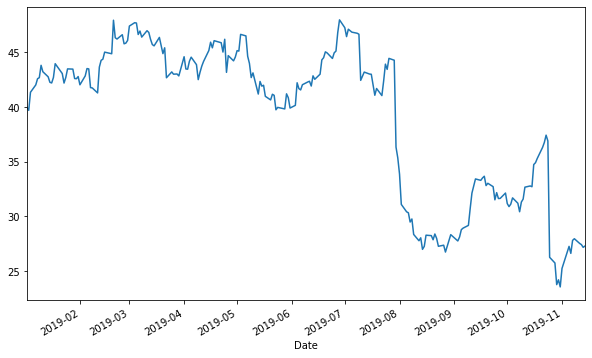

In [14]:
closes2018.GVA.plot(figsize=(10,6));

# **Precios simulados en 1000 escenarios del año 2018**

In [18]:
simret_STRL = ret_sim(mu_STRL, std_STRL, 252, 1000, '2018-01-01')
simret_CX = ret_sim(mu_CX ,std_CX , 252, 1000, '2018-01-01')

In [19]:
simcloses_STRL = closes.iloc[-1].STRL*((1+simret_STRL).cumprod())
simcloses_CX= closes.iloc[-1].CX*((1+simret_CX).cumprod())

### Sterling Construction Company, Inc. (STRL)

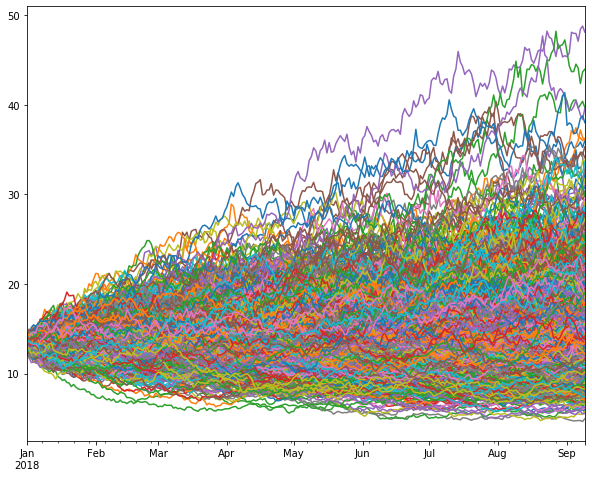

In [20]:
simcloses_STRL.plot(figsize=(10,8),legend=False);

**Probabilidades con base en una tasa de interés anual deseada del $10\%$.**

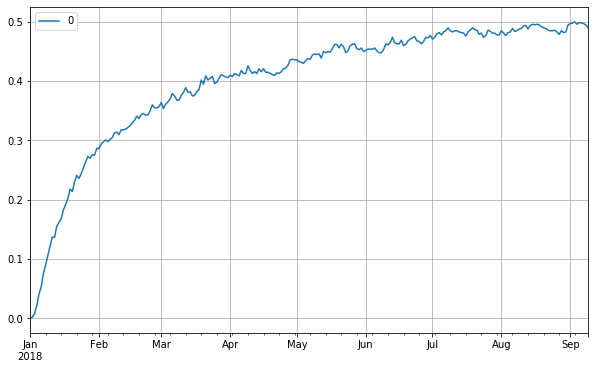

In [21]:
K_STRL = (1+0.1)*closes.iloc[-1].STRL
DF = simcloses_STRL>K_STRL
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

### CEMEX, S.A.B. de C.V.(CX)

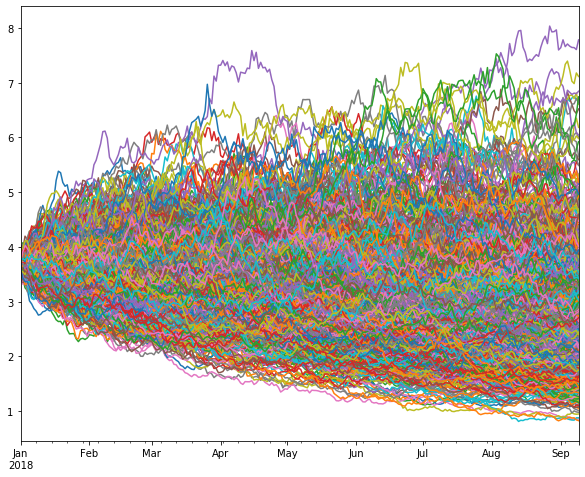

In [22]:
simcloses_CX.plot(figsize=(10,8),legend=False);

**Probabilidades con base en una tasa de interés anual deseada del $10\%$.**

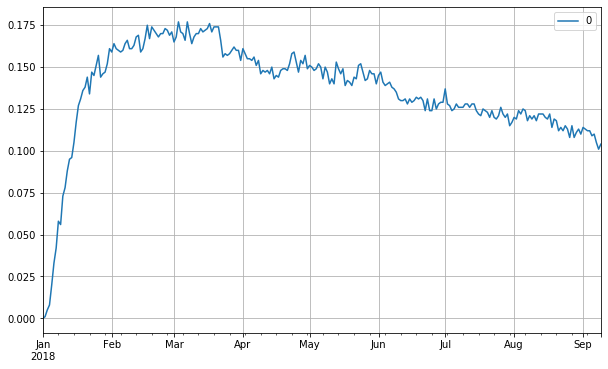

In [23]:
K_CX = (1+0.1)*closes.iloc[-1].CX
DF = simcloses_CX>K_CX
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

### **Valores reales del 2019**

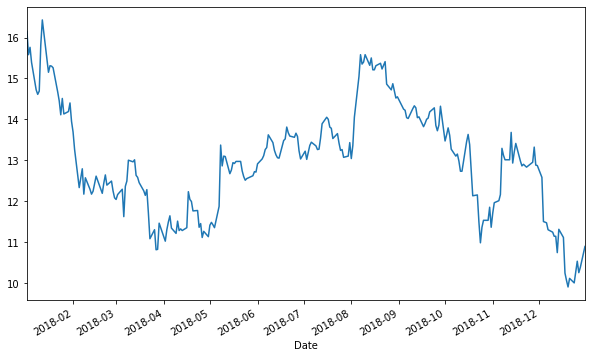

In [29]:
start, end = '2018-01-01', '2018-12-31'
name = ['STRL','CX']
closes2018 = get_closes(name,start,end)
closes2018.STRL.plot(figsize=(10,6));

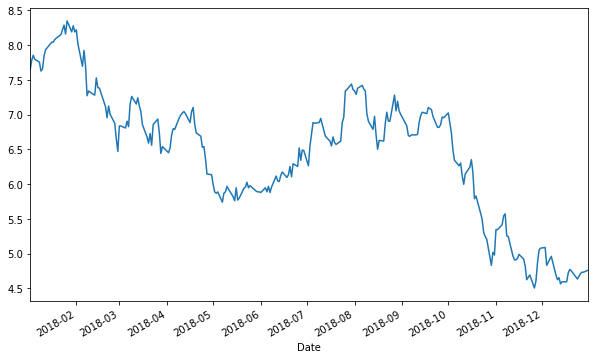

In [25]:
closes2018.CX.plot(figsize=(10,6));